# Projekt Terawatt

Simulation der Systemdelays am Energiecampus.

In [2]:
import iplantuml

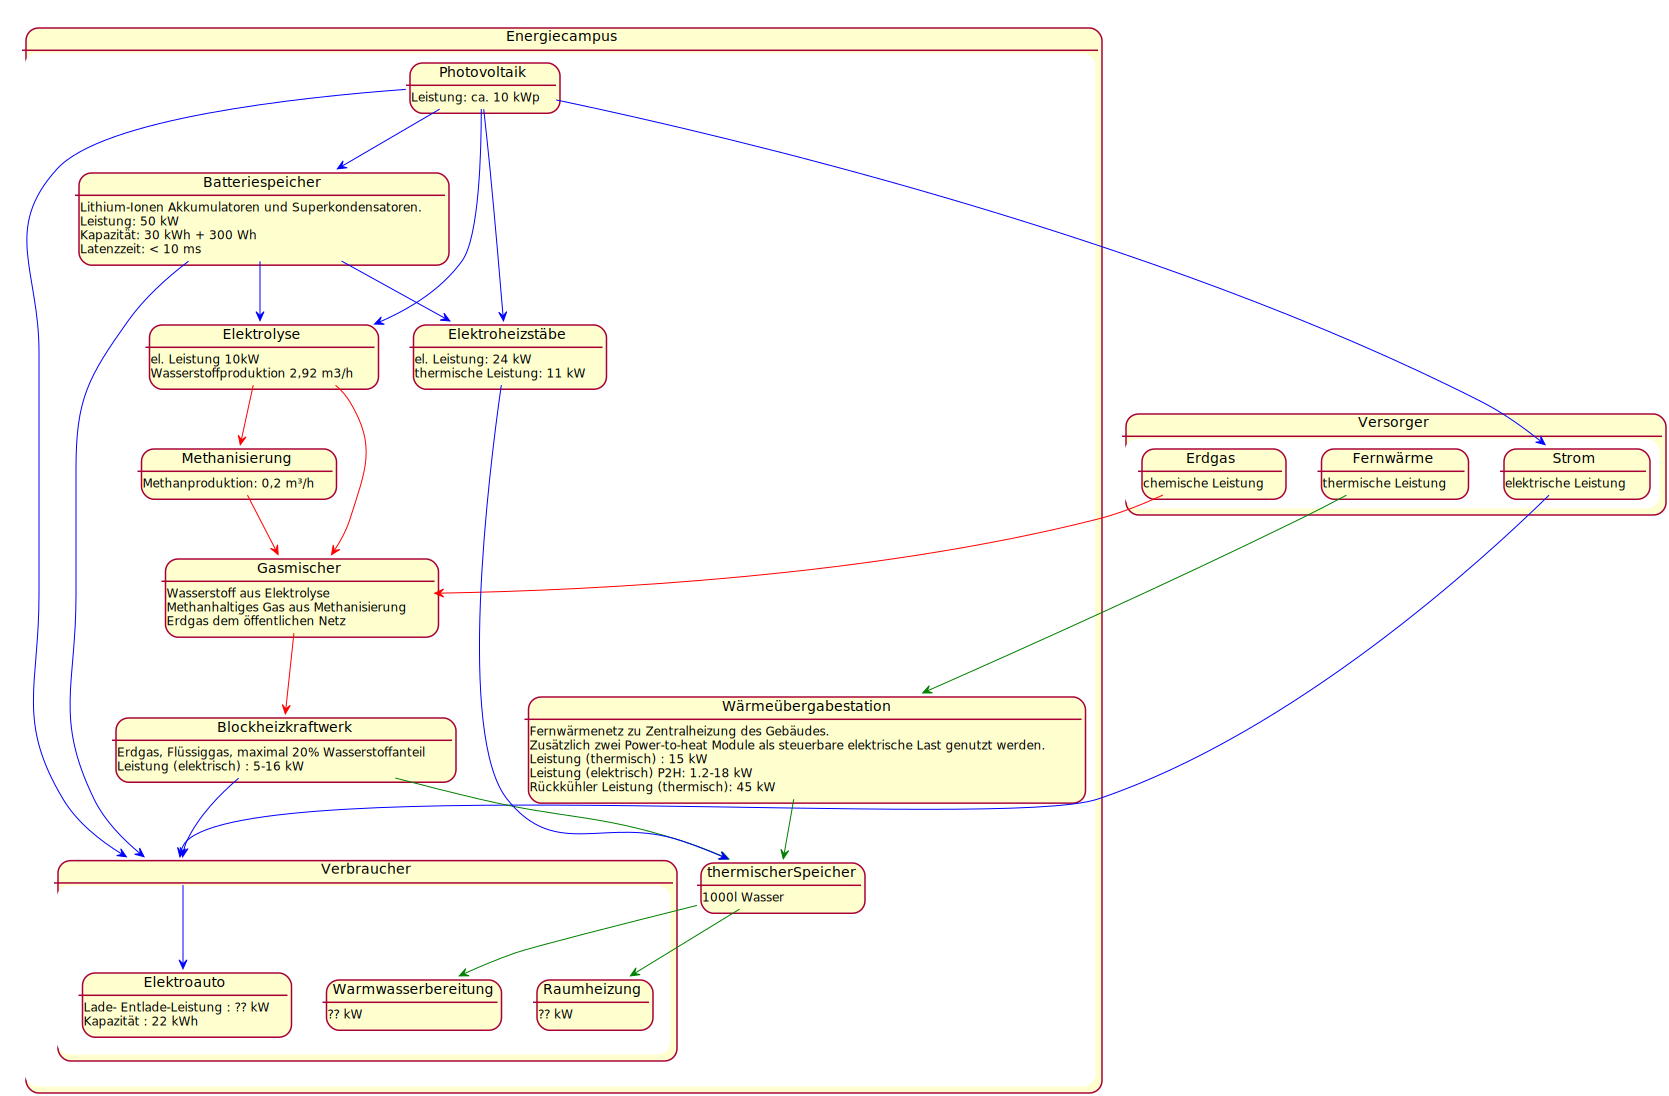

In [36]:
%%plantuml

@startuml


state Energiecampus{
    Gasmischer : Wasserstoff aus Elektrolyse
    Gasmischer : Methanhaltiges Gas aus Methanisierung
    Gasmischer : Erdgas dem öffentlichen Netz
    Wärmeübergabestation : Fernwärmenetz zu Zentralheizung des Gebäudes. 
}

state Versorger{
    Strom -[#blue]-> Verbraucher 
    Strom : elektrische Leistung
    Erdgas -[#red]-> Gasmischer
    Erdgas : chemische Leistung
    Fernwärme -[#green]-> Wärmeübergabestation
    Fernwärme : thermische Leistung
}

state Energiecampus{
    
    state Verbraucher {
        Elektroauto : Lade- Entlade-Leistung : ?? kW
        Elektroauto : Kapazität : 22 kWh
        Raumheizung : ?? kW
        Warmwasserbereitung : ?? kW
    }                    
    
    Blockheizkraftwerk -[#green]-> thermischerSpeicher
    Blockheizkraftwerk -[#blue]-> Verbraucher
    Blockheizkraftwerk : Erdgas, Flüssiggas, maximal 20% Wasserstoffanteil
    Blockheizkraftwerk : Leistung (elektrisch) : 5-16 kW

    Gasmischer -[#red]-> Blockheizkraftwerk

    Wärmeübergabestation : Zusätzlich zwei Power-to-heat Module als steuerbare elektrische Last genutzt werden. 
    Wärmeübergabestation : Leistung (thermisch) : 15 kW
    Wärmeübergabestation : Leistung (elektrisch) P2H: 1.2-18 kW
    Wärmeübergabestation : Rückkühler Leistung (thermisch): 45 kW
    Wärmeübergabestation -[#green]-> thermischerSpeicher

    Batteriespeicher : Lithium-Ionen Akkumulatoren und Superkondensatoren. 
    Batteriespeicher : Leistung: 50 kW
    Batteriespeicher : Kapazität: 30 kWh + 300 Wh
    Batteriespeicher : Latenzzeit: < 10 ms
    Batteriespeicher -[#blue]-> Verbraucher
    Verbraucher -[#blue]-> Elektroauto

    Photovoltaik : Leistung: ca. 10 kWp
    Photovoltaik -[#blue]-> Strom
    Photovoltaik -[#blue]-> Verbraucher
    Photovoltaik -[#blue]-> Batteriespeicher
    Photovoltaik -[#blue]-> Elektrolyse
    Photovoltaik -[#blue]-> Elektroheizstäbe
                                                            
    Elektrolyse : el. Leistung 10kW
    Elektrolyse : Wasserstoffproduktion 2,92 m3/h
    Batteriespeicher -[#blue]-> Elektrolyse
    Elektrolyse -[#red]-> Gasmischer
    Elektrolyse -[#red]-> Methanisierung

    Methanisierung : Methanproduktion: 0,2 m³/h
    Methanisierung -[#red]-> Gasmischer

    thermischerSpeicher -[#green]-> Warmwasserbereitung
    thermischerSpeicher -[#green]-> Raumheizung
    thermischerSpeicher : 1000l Wasser

    Elektroheizstäbe : el. Leistung: 24 kW
    Elektroheizstäbe : thermische Leistung: 11 kW
    Elektroheizstäbe -[#blue]-> thermischerSpeicher
                                                                                
    Batteriespeicher -[#blue]-> Elektroheizstäbe
}

@enduml 